Objective

The objective is to build a regressor model which can predict the heart rate of an individual. This prediction can help to monitor stress levels of the individual.

Evaluation Metric
Mean Absolute Error :


n - total number of predicted samples, xi predicted output, x actual output

MEAN_RR - Mean of RR intervals
MEDIAN_RR - Median of RR intervals
SDRR - Standard deviation of RR intervals
RMSSD - Root mean square of successive RR interval differences
SDSD - Standard deviation of successive RR interval differences
SDRR_RMSSD - Ratio of SDRR / RMSSD
pNN25 - Percentage of successive RR intervals that differ by more than 25 ms
pNN50 - Percentage of successive RR intervals that differ by more than 50 ms
KURT - Kurtosis of distribution of successive RR intervals
SKEW - Skew of distribution of successive RR intervals
MEAN_REL_RR - Mean of relative RR intervals
MEDIAN_REL_RR - Median of relative RR intervals
SDRR_REL_RR - Standard deviation of relative RR intervals
RMSSD_REL_RR - Root mean square of successive relative RR interval differences
SDSD_REL_RR - Standard deviation of successive relative RR interval differences
SDRR_RMSSD_REL_RR - Ratio of SDRR/RMSSD for relative RR interval differences
KURT_REL_RR - Kurtosis of distribution of relative RR intervals
SKEW_REL_RR - Skewness of distribution of relative RR intervals
uuid - Unique ID for each patient
VLF - Absolute power of the very low frequency band (0.0033 - 0.04 Hz)
VLF_PCT - Principal component transform of VLF
LF - Absolute power of the low frequency band (0.04 - 0.15 Hz)
LF_PCT - Principal component transform of LF
LF_NU  - Absolute power of the low frequency band in normal units
HF - Absolute power of the high frequency band (0.15 - 0.4 Hz)
HF_PCT - Principal component transform of HF
HF_NU - Absolute power of the highest frequency band in normal units
TP - Total power of RR intervals
LF_HF - Ratio of LF to HF
HF_LF - Ratio of HF to LF
SD1 - Poincaré plot standard deviation perpendicular to the line of identity
SD2 - Poincaré plot standard deviation along the line of identity
Sampen - sample entropy which measures the regularity and complexity of a time series
higuci - higuci fractal dimension of heartrate
datasetId - ID of the whole dataset
condition - condition of the patient at the time the data was recorded
HR - Heart rate of the patient at the time of data recorded


VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'LF_HF',
       'MEAN_RR', 'HR', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
       'sampen', 'higuci', 'condition'
       
       'LF_PCT', 'HF_NU', 'LF_HF', 'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'HR',
       'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR', 'KURT_REL_RR',
       'SKEW_REL_RR', 'sampen', 'higuci', 'condition'

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns


from sklearn import metrics 

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_frequency=pd.read_csv("frequency_domain_features_train.csv")
df_frequency.head()

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF
0,89df2855-56eb-4706-a23b-b39363dd605a,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055
2,c2d5d102-967c-487d-88f2-8b005a449f3e,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607
3,37eabc44-1349-4040-8896-0d113ad4811f,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912


In [3]:
df_time=pd.read_csv("time_domain_features_train.csv")
df_time.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,uuid
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218,89df2855-56eb-4706-a23b-b39363dd605a
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286,80c795e4-aa56-4cc0-939c-19634b89cbb2
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813,c2d5d102-967c-487d-88f2-8b005a449f3e
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138,37eabc44-1349-4040-8896-0d113ad4811f
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7


In [4]:
df_heart_rate=pd.read_csv("heart_rate_non_linear_features_train.csv")
df_heart_rate.head()

,uuid,SD1,SD2,sampen,higuci,datasetId,condition
0,89df2855-56eb-4706-a23b-b39363dd605a,11.001565,199.061782,2.139754,1.163485,2,no stress
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,9.170129,114.634458,2.174499,1.084711,2,interruption
2,c2d5d102-967c-487d-88f2-8b005a449f3e,11.533417,118.939253,2.135350,1.176315,2,interruption
3,37eabc44-1349-4040-8896-0d113ad4811f,11.119476,127.318597,2.178341,1.179688,2,no stress
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,13.590641,87.718281,2.221121,1.249612,2,no stress


In [5]:
df_frequency.shape

(369289, 12)

In [6]:
df_time.shape

(369289, 20)

In [7]:
df_heart_rate.shape

(369289, 7)

In [8]:
df_heart_rate.describe()

,SD1,SD2,sampen,higuci,datasetId
count,369289.000000,369289.000000,369289.000000,369289.000000,369289.0
mean,10.593708,154.178997,2.062471,1.182292,2.0
std,2.914795,109.170222,0.206999,0.062192,0.0
min,3.911344,38.307745,0.434576,1.033984,2.0
25%,8.368340,90.326864,2.032977,1.139929,2.0
50%,10.196621,116.221063,2.134214,1.174293,2.0
75%,12.679005,166.764850,2.181929,1.223621,2.0
max,18.836107,796.852945,2.234841,1.361219,2.0


In [9]:
from functools import reduce
dfs = [df_frequency,df_time,df_heart_rate]
df_final = reduce(lambda left,right: pd.merge(left,right,on='uuid'),dfs)

In [10]:
df_final=df_final.drop(['uuid'],axis=1)
df_final=df_final.drop(['datasetId'],axis=1)

In [11]:
df_final.head()

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,...,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,SD1,SD2,sampen,higuci,condition
0,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,...,0.007969,0.007969,2.143342,-0.856554,0.335218,11.001565,199.061782,2.139754,1.163485,no stress
1,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,...,0.004769,0.004769,2.930855,-0.408190,-0.155286,9.170129,114.634458,2.174499,1.084711,interruption
2,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,...,0.008716,0.008716,2.127053,0.351789,-0.656813,11.533417,118.939253,2.135350,1.176315,interruption
3,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,...,0.008660,0.008660,2.050988,-0.504947,-0.386138,11.119476,127.318597,2.178341,1.179688,no stress
4,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,...,0.013055,0.013055,1.816544,-0.548408,-0.154252,13.590641,87.718281,2.221121,1.249612,no stress


In [12]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369289 entries, 0 to 369288
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   VLF                369289 non-null  float64
 1   VLF_PCT            369289 non-null  float64
 2   LF                 369289 non-null  float64
 3   LF_PCT             369289 non-null  float64
 4   LF_NU              369289 non-null  float64
 5   HF                 369289 non-null  float64
 6   HF_PCT             369289 non-null  float64
 7   HF_NU              369289 non-null  float64
 8   TP                 369289 non-null  float64
 9   LF_HF              369289 non-null  float64
 10  HF_LF              369289 non-null  float64
 11  MEAN_RR            369289 non-null  float64
 12  MEDIAN_RR          369289 non-null  float64
 13  SDRR               369289 non-null  float64
 14  RMSSD              369289 non-null  float64
 15  SDSD               369289 non-null  float64
 16  SD

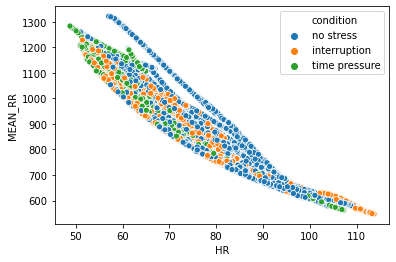

In [13]:
#sns.scatterplot(df_final['HR'], hue=df_final['condition'])
sns.scatterplot(df_final['HR'],df_final['MEAN_RR'], hue=df_final['condition'])
plt.show()

In [14]:
corr_df=df_final.corr().abs()
corr_df

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,...,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,SD1,SD2,sampen,higuci
VLF,1.000000,0.676628,0.026521,0.664830,0.105044,0.010441,0.389684,0.105044,0.951800,0.126668,...,0.242427,0.087994,0.087993,0.303226,0.050392,0.236819,0.341293,0.798240,0.290457,0.570043
VLF_PCT,0.676628,1.000000,0.541976,0.995240,0.046868,0.283068,0.460465,0.046868,0.470337,0.103768,...,0.343214,0.333824,0.333824,0.277593,0.090900,0.228209,0.278996,0.581071,0.396915,0.551476
LF,0.026521,0.541976,1.000000,0.570404,0.247482,0.315662,0.032871,0.247482,0.331037,0.099452,...,0.783464,0.524338,0.524337,0.077445,0.144318,0.075650,0.887012,0.020562,0.222920,0.035736
LF_PCT,0.664830,0.995240,0.570404,1.000000,0.043265,0.216789,0.371761,0.043265,0.452276,0.082040,...,0.327483,0.288087,0.288087,0.215372,0.106355,0.238718,0.299684,0.576758,0.415872,0.496831
LF_NU,0.105044,0.046868,0.247482,0.043265,1.000000,0.749237,0.840496,1.000000,0.155373,0.281325,...,0.247067,0.582438,0.582438,0.760120,0.216003,0.205864,0.185263,0.002995,0.304454,0.577690
HF,0.010441,0.283068,0.315662,0.216789,0.749237,1.000000,0.721758,0.749237,0.107987,0.220058,...,0.732687,0.883734,0.883735,0.581391,0.085113,0.184903,0.332324,0.048295,0.171254,0.434092
HF_PCT,0.389684,0.460465,0.032871,0.371761,0.840496,0.721758,1.000000,0.840496,0.360688,0.241191,...,0.286441,0.555832,0.555832,0.682511,0.102859,0.000527,0.072056,0.281651,0.007106,0.727750
HF_NU,0.105044,0.046868,0.247482,0.043265,1.000000,0.749237,0.840496,1.000000,0.155373,0.281325,...,0.247067,0.582438,0.582438,0.760120,0.216003,0.205864,0.185263,0.002995,0.304454,0.577690
TP,0.951800,0.470337,0.331037,0.452276,0.155373,0.107987,0.360688,0.155373,1.000000,0.144087,...,0.480078,0.260477,0.260477,0.295681,0.088653,0.205367,0.594883,0.748643,0.211720,0.517278
LF_HF,0.126668,0.103768,0.099452,0.082040,0.281325,0.220058,0.241191,0.281325,0.144087,1.000000,...,0.069479,0.204986,0.204986,0.428285,0.074650,0.080524,0.170234,0.016344,0.108667,0.244251


In [15]:
c=corr_df.unstack()
co=c.sort_values(kind='quicksort')
co_df=pd.DataFrame(co)
co_df.columns=['corr']

#co_df=co_df.drop_duplicates(subset='corr',keep='first').reset_index(drop=True)
co_df

,,corr
HF_LF,SDRR,0.000024
SDRR,HF_LF,0.000024
SD2,MEAN_REL_RR,0.000212
MEAN_REL_RR,SD2,0.000212
SDRR,MEAN_REL_RR,0.000217
...,...,...
pNN50,pNN50,1.000000
SDRR_REL_RR,SDRR_REL_RR,1.000000
higuci,higuci,1.000000
HF_NU,LF_NU,1.000000


In [ ]:
#co_df.reset_index(level=[0,1],inplace=True)
#co_df.columns
#co_df.rename(columns={'level_0':'feature1','level_1':'feature2'},inplace=True)
#co_df

In [ ]:
#co_df=co_df.drop_duplicates(subset='corr',keep='first').reset_index(drop=True)
#co_df

In [17]:
remove_features=co_df.loc[co_df['corr']>=0.75]
remove_features.reset_index(inplace=True)
remove_features

,level_0,level_1,corr
0,pNN50,SDRR_REL_RR,0.756253
1,SDRR_REL_RR,pNN50,0.756253
2,HF_LF,HF,0.757545
3,HF,HF_LF,0.757545
4,HF_NU,SDRR_RMSSD_REL_RR,0.760120
...,...,...,...
121,pNN50,pNN50,1.000000
122,SDRR_REL_RR,SDRR_REL_RR,1.000000
123,higuci,higuci,1.000000
124,HF_NU,LF_NU,1.000000


In [19]:
#remove_features.reset_index(level=[0,1],inplace=True)
remove_features.columns
remove_features.rename(columns={'level_0':'feature1','level_1':'feature2'},inplace=True)
remove_features


,feature1,feature2,corr
0,pNN50,SDRR_REL_RR,0.756253
1,SDRR_REL_RR,pNN50,0.756253
2,HF_LF,HF,0.757545
3,HF,HF_LF,0.757545
4,HF_NU,SDRR_RMSSD_REL_RR,0.760120
...,...,...,...
121,pNN50,pNN50,1.000000
122,SDRR_REL_RR,SDRR_REL_RR,1.000000
123,higuci,higuci,1.000000
124,HF_NU,LF_NU,1.000000


In [20]:
remove_features=remove_features.drop_duplicates(subset='corr',keep='first').reset_index(drop=True)
remove_features=remove_features[remove_features['feature1']!=remove_features['feature2']].reset_index(drop=True)
remove_features

,feature1,feature2,corr
0,pNN50,SDRR_REL_RR,0.756253
1,HF_LF,HF,0.757545
2,HF_NU,SDRR_RMSSD_REL_RR,0.760120
3,LF_NU,SDRR_RMSSD_REL_RR,0.760120
4,pNN25,SDRR_REL_RR,0.760177
5,higuci,SDRR_RMSSD_REL_RR,0.763581
6,LF,SDRR_REL_RR,0.783464
7,SD1,pNN50,0.794774
8,SDSD,pNN50,0.794774
9,RMSSD,pNN50,0.794846


In [21]:
remove_list=remove_features['feature2'].to_list()
remove_list=list(set(remove_list))
remove_list

['TP',
 'HF_PCT',
 'SDRR_RMSSD_REL_RR',
 'LF',
 'SD2',
 'VLF',
 'HF',
 'RMSSD_REL_RR',
 'SD1',
 'SDSD_REL_RR',
 'pNN25',
 'HF_LF',
 'SDSD',
 'SDRR_RMSSD',
 'SDRR_REL_RR',
 'RMSSD',
 'pNN50',
 'MEAN_RR',
 'LF_NU',
 'MEDIAN_RR',
 'VLF_PCT']

In [22]:

## excluding the Target Variable
#remove_list.remove('HR')
len(remove_list)

21

In [23]:
sample_train=df_final.drop(remove_list,axis=1)

In [24]:
sample_train

,LF_PCT,HF_NU,LF_HF,SDRR,HR,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,KURT_REL_RR,SKEW_REL_RR,sampen,higuci,condition
0,27.375666,1.514737,65.018055,140.972741,69.499952,-0.856554,0.335218,-0.000203,-0.000179,-0.856554,0.335218,2.139754,1.163485,no stress
1,22.954139,0.304603,327.296635,81.317742,64.363150,-0.408190,-0.155286,-0.000059,0.000611,-0.408190,-0.155286,2.174499,1.084711,interruption
2,48.335104,1.049528,94.280910,84.497236,67.450066,0.351789,-0.656813,-0.000011,-0.000263,0.351789,-0.656813,2.135350,1.176315,interruption
3,29.290305,1.775294,55.328701,90.370537,68.809562,-0.504947,-0.386138,0.000112,0.000494,-0.504947,-0.386138,2.178341,1.179688,no stress
4,54.242160,3.279993,29.487873,62.766242,74.565728,-0.548408,-0.154252,-0.000100,-0.002736,-0.548408,-0.154252,2.221121,1.249612,no stress
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369284,48.219676,10.880317,8.190908,36.377559,83.384647,1.007321,0.075965,0.000015,0.000083,1.007321,0.075965,2.096850,1.314910,no stress
369285,31.481178,0.357547,278.683532,74.918433,61.314243,0.248964,0.167716,-0.000110,0.000046,0.248964,0.167716,2.131264,1.175975,no stress
369286,54.870376,0.180070,554.340761,95.309200,59.028594,-0.429686,-0.075321,-0.000216,-0.002236,-0.429686,-0.075321,2.215643,1.140232,no stress
369287,43.587168,3.522995,27.384942,78.449897,75.978628,0.600389,-0.634762,0.000024,-0.001354,0.600389,-0.634762,2.091628,1.181937,no stress


In [30]:
sample_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369289 entries, 0 to 369288
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   LF_PCT         369289 non-null  float64
 1   HF_NU          369289 non-null  float64
 2   LF_HF          369289 non-null  float64
 3   SDRR           369289 non-null  float64
 4   HR             369289 non-null  float64
 5   KURT           369289 non-null  float64
 6   SKEW           369289 non-null  float64
 7   MEAN_REL_RR    369289 non-null  float64
 8   MEDIAN_REL_RR  369289 non-null  float64
 9   KURT_REL_RR    369289 non-null  float64
 10  SKEW_REL_RR    369289 non-null  float64
 11  sampen         369289 non-null  float64
 12  higuci         369289 non-null  float64
 13  condition      369289 non-null  object 
dtypes: float64(13), object(1)
memory usage: 42.3+ MB


In [31]:
df_final=sample_train

In [32]:
from sklearn.preprocessing import LabelEncoder   # import label encoder

labelencoder= LabelEncoder()  
df_final['condition'] = labelencoder.fit_transform(df_final['condition'])

df_final['condition'] = df_final['condition'].astype('float64')
df_final.dtypes

LF_PCT           float64
HF_NU            float64
LF_HF            float64
SDRR             float64
HR               float64
KURT             float64
SKEW             float64
MEAN_REL_RR      float64
MEDIAN_REL_RR    float64
KURT_REL_RR      float64
SKEW_REL_RR      float64
sampen           float64
higuci           float64
condition        float64
dtype: object

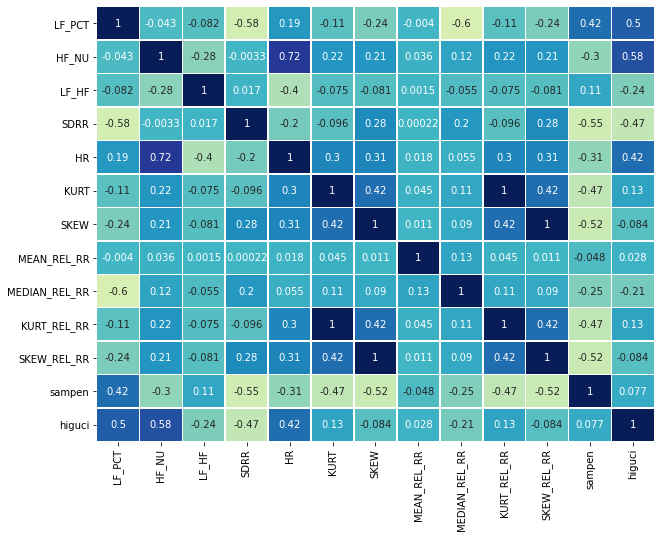

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(sample_train.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

In [33]:
# Separating dependent and independent variables
X = df_final.drop('HR',axis=1)
Y = df_final['HR']

In [34]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size=0.3, random_state=1)

In [35]:
algo= []
Accuracy = []
mae = []
# Blanks list to store model name, cross validated r2 score mean and MAE

In [36]:
# Linear Regression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline([('scaler', StandardScaler()),('reg', LinearRegression())])

pipeline.fit(X_train, Y_train)


# Make predictions using the testing set
Y_predict= pipeline.predict(X_test)


# The mean squared error
print('Mean squared error: %.2f'
      % mean_absolute_error(Y_test, Y_predict))

print('Test Accuracy: %.3f' % pipeline.score(X_test, Y_test))
algo.append('Linear Regression')
Accuracy.append(pipeline.score(X_test, Y_test))
mae.append(mean_absolute_error(Y_test, Y_predict))


Mean squared error: 3.70
Test Accuracy: 0.778


In [42]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=7)

model.fit(X_train, Y_train)

Y_predict= model.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_absolute_error(Y_test, Y_predict))
#score = cross_val_score(model, X_test, y_test)
print('Model Score: %.3f' % model.score(X_test, Y_test))


algo.append('Random Forest')
Accuracy.append(model.score(X_test, Y_test))
mae.append(mean_absolute_error(Y_test, Y_predict))
#cv_rmse_mean.append((-cross_val_score(model, X, Y, cv=k, scoring='neg_mean_absolute_error').mean())**0.5)

Mean squared error: 0.03
Model Score: 1.000


In [38]:

# Bagging

from sklearn.ensemble import BaggingRegressor

model = BaggingRegressor(random_state=7)

model.fit(X_train, Y_train)

Y_predict= model.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_absolute_error(Y_test, Y_predict))
#score = cross_val_score(model, X_test, y_test)
print('Model Score: %.3f' % model.score(X_test, Y_test))


algo.append('Bagging')
#cv_r2_mean.append(cross_val_score(model, X, Y, cv=k).mean())
Accuracy.append(model.score(X_test, Y_test))
mae.append(mean_absolute_error(Y_test, Y_predict))
#cv_rmse_mean.append((-cross_val_score(model, X, Y, cv=k, scoring='neg_mean_squared_error').mean())**0.5);

Mean squared error: 0.04
Model Score: 1.000


In [39]:
# AdaBoost
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor(random_state=7)

model.fit(X_train, Y_train)

Y_predict= model.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_absolute_error(Y_test, Y_predict))
#score = cross_val_score(model, X_test, y_test)
print('Model Score: %.3f' % model.score(X_test, Y_test))
algo.append('AdaBoost')
#cv_r2_mean.append(cross_val_score(model, X, Y, cv=k).mean())
Accuracy.append(model.score(X_test, Y_test))
mae.append(mean_absolute_error(Y_test, Y_predict))
#cv_rmse_mean.append((-cross_val_score(model, X, Y, cv=k, scoring='neg_mean_squared_error').mean())**0.5)

Mean squared error: 4.07
Model Score: 0.762


In [40]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=7)

model.fit(X_train, Y_train)
Y_predict= model.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_absolute_error(Y_test, Y_predict))
#score = cross_val_score(model, X_test, y_test)
print('Model Score: %.3f' % model.score(X_test, Y_test))

algo.append('Gradient Boosting')
#cv_r2_mean.append(cross_val_score(model, X, Y, cv=k).mean())
Accuracy.append(model.score(X_test, Y_test))
mae.append(mean_absolute_error(Y_test, Y_predict))
#cv_mae_mean.append((-cross_val_score(model, X, Y, cv=k, scoring='neg_mean_squared_error').mean())**0.5)

Mean squared error: 2.18
Model Score: 0.910


In [41]:
# DataFrame to compare results.

results = pd.DataFrame()
results['Model'] = algo
results['Accuracy'] = Accuracy
results['MAE'] = mae
results = results.set_index('Model')
results

,Accuracy,MAE
Model,,
Linear Regression,0.778123,3.695370
Random Forest,0.999653,0.034587
Bagging,0.999550,0.040216
AdaBoost,0.761938,4.074871
Gradient Boosting,0.910168,2.180484


In [ ]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_predict})
df